<a id='title'></a>
# Project: 泰坦尼克号数据调查

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> 数据集记录了泰坦尼克号上的乘客的相关信息，包括名字、性别、年龄、票信息、是否生还等。<br />
> 数据表中相关字段的信息如下：<br />

<table>
<tr>
<td align="left">Variable</td>
<td align="left">Definition</td>
<td align="left">Key</td>
</tr>

<tr>
<td align="left">Survived</td>
<td align="left">survival</td>
<td align="left">0 = No, 1 = Yes</td>
</tr>

<tr>
<td align="left">Pclass</td>
<td align="left">Ticket class</td>
<td align="left">1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)</td>
</tr>

<tr>
<td align="left">Sex</td>
<td align="left">sex</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Age</td>
<td align="left">Age in years</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Sibsp</td>
<td align="left"># of siblings / spouses aboard the Titanic</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Parch</td>
<td align="left"> # of parents / children aboard the Titanic</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Ticket</td>
<td align="left">Ticket number</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Fare</td>
<td align="left">Passenger fare</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Cabin</td>
<td align="left">Cabin number</td>
<td align="left"></td>
</tr>

<tr>
<td align="left">Embarked</td>
<td align="left">Port of Embarkation</td>
<td align="left">C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</table>

### 展开调查的问题：
<ul>
<li><a href="#eda">问题1：年龄与乘客生还的情况怎么样？</a></li>
<li><a href="#question2">问题2：性别与乘客生化的情况怎么样？</a></li>
<li><a href="#question3">问题3：不同的票等级(pclass)与乘客生还的情况？</a></li>
<li><a href="#question4">问题4：不同登陆港口的乘客与生化情况如何？</a></li>
<li><a href="#question5">问题5：费用与票价等级的对应关系如何？ </a></li>
<li><a href="#question6">问题6：不同费用的乘客的生还情况如何？</a></li>
<li><a href="#question7">问题7：从三个港口登陆的乘客的费用是否有不同？</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
from fractions import Fraction
import scipy
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
titanic_df = pd.read_csv(r'.\titanic_data\titanic-data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 观察缺失值数据并处理缺失值数据

In [5]:
#设计一个函数，返回一个字典，字典的key是是字段名，value是该字段有NaN值的个数。

def get_null_record(df): #df为DataFrame对象
    dict_null = {}
    for column in df.columns:
        if not len(df[df[column].isnull()]) == 0:
            dict_null[column] = len(df[df[column].isnull()])
    return dict_null

In [6]:
#确认一下titanic_df数据集中的每个字段的NaN值情况
data_null_dic = get_null_record(titanic_df)
print data_null_dic
print len(titanic_df)

{'Age': 177, 'Cabin': 687, 'Embarked': 2}
891


#### 处理船舱Cabin字段的缺失值：
 船舱Cabin字段的NaN数量太庞大，有687个，将这些缺失值用'Unknown'来填充。

In [7]:
titanic_df['Cabin'].fillna('Unknown', inplace = True)

#### 处理年龄的缺失值：
用年龄缺失值来填充这些缺失值。

In [8]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age,inplace = True)

#### 处理登陆港口的缺失值：
登陆港口的缺失值很少，只有2个，就随便选三种中一个来填充，这里选'S'填充。

In [9]:
titanic_df['Cabin'].fillna('S', inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 : 年龄与乘客生还的情况怎么样？

#### 1.1 单变量探索：生化或未生化数

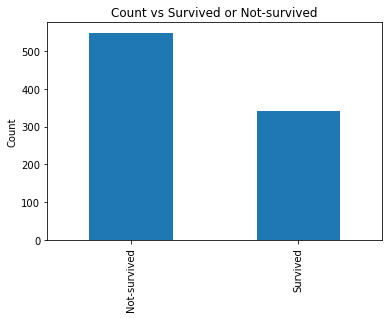

In [10]:
#画年龄的条形图
survived_date = pd.Series(titanic_df.groupby(['Survived'])['PassengerId'].count().values,index = ['Not-survived','Survived'])
survived_date.plot(kind='bar')

plt.ylabel('Count')
plt.title('Count vs Survived or Not-survived')


从条形图看出，总体死亡人数比获救生还的人数多。

#### 1.2 单变量探索：年龄

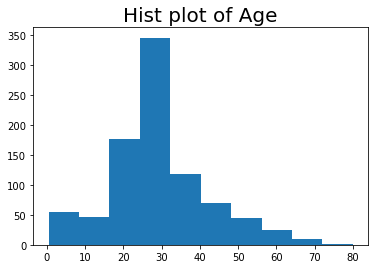

In [11]:
#画年龄的直方图
titanic_df['Age'].hist()
#设置标题
plt.title('Hist plot of Age', fontsize = 20)
#消除网格线
plt.grid(False)

从年龄的直方图可以看出，大部分的乘客年龄在20-40虽之间。

#### 1.3 计算年龄段与生还的相关系数

In [12]:
# 计算最大年龄
age_max = titanic_df['Age'].max()
print age_max

80.0


In [13]:
#计算最小年龄
age_min = titanic_df['Age'].min()
print age_min

0.42


In [14]:
#对age变量分组，间隔为12.年龄段将被分成['(0, 12]', '(12, 24]', '(24, 36]', '(36, 48]', '(48, 60]', '(60, 72]', '(72, 84]']
bins = np.arange(0,90,12)
bins

array([ 0, 12, 24, 36, 48, 60, 72, 84])

In [15]:
#新增一个变量Age_group,对应每个Age变量所属年龄段标签
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,"(12, 24]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(36, 48]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,"(24, 36]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(24, 36]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,"(24, 36]"


In [47]:
r = titanic_df['Survived'].corr(titanic_df['Age_group'], method='kendall')
r

-0.056157878334184556

年龄段与生还的相关系数很小，也即相关性很弱。相关系数在这里仅仅作为参考。

#### 1.4 计算各年龄段和乘客生化的数据

In [18]:
#统计每个年龄段的总人数
df_total_count_each_age_group = titanic_df.groupby(['Age_group'],as_index = False)['PassengerId'].count()
df_total_count_each_age_group

,Age_group,PassengerId
0,"(0, 12]",69
1,"(12, 24]",208
2,"(24, 36]",419
3,"(36, 48]",115
4,"(48, 60]",58
5,"(60, 72]",20
6,"(72, 84]",2


In [19]:
#统计每个年龄段的生还人数
df_survival_count_each_age_group = titanic_df[titanic_df['Survived'] == 1].groupby(['Age_group'], as_index = False)['PassengerId'].count()
df_survival_count_each_age_group

,Age_group,PassengerId
0,"(0, 12]",40
1,"(12, 24]",78
2,"(24, 36]",152
3,"(36, 48]",41
4,"(48, 60]",26
5,"(60, 72]",4
6,"(72, 84]",1


In [20]:
#计算每个年龄段的生还率
survival_rate_each_group = df_survival_count_each_age_group['PassengerId']/df_total_count_each_age_group['PassengerId']
survival_rate_each_group = pd.Series(survival_rate_each_group.values, index = df_survival_count_each_age_group['Age_group'])
survival_rate_each_group

Age_group
(0, 12]     0.579710
(12, 24]    0.375000
(24, 36]    0.362768
(36, 48]    0.356522
(48, 60]    0.448276
(60, 72]    0.200000
(72, 84]    0.500000
dtype: float64

#### 1.5 可视化年龄段与生还率

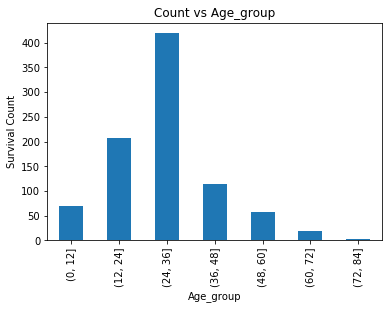

In [21]:
#可视化每个年龄段的生还人数
titanic_df.groupby(['Age_group'])['PassengerId'].count().plot(kind='bar')
plt.title('Count vs Age_group')
plt.ylabel('Survival Count')

生还人数最多的年龄段在24-36岁之间。

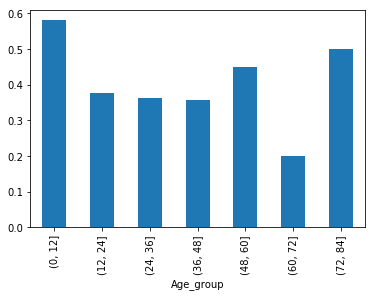

In [22]:
#可视化每个年龄段的生还率
survival_rate_each_group.plot(kind='bar')

在(0-12]年龄的乘客生还率最高，在(60,72]年龄段的乘客的生还率最低，其它各年龄段的生还率差别不是很大。

> 结论：
>1. 死亡人数比获救人数多。
>2. 生还与年龄段的相关系数很小。
>3. 生还人数最多的年龄段在24-36岁之间。
>4. 在(0-12]年龄的乘客生还率最高，在(60,72]年龄段的乘客的生还率最低，其它各年龄段的生还率差别不是很大。

<a id='question2'></a>
### Research Question 2：性别与乘客生化的情况怎么样？

#### 2.1 单变量探索：性别

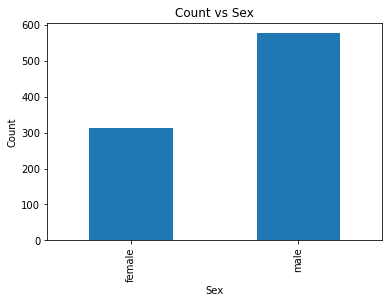

In [23]:
#画所有乘客性别的条形图
sex_data = titanic_df.groupby(['Sex']).PassengerId.count()
sex_data.plot(kind='bar')

plt.ylabel('Count')
plt.title('Count vs Sex')

从条形图可以看出，船上的男性乘客比女性乘客的数量多。

#### 2.2 计算性别与生还的相关系数

In [24]:
titanic_df['Survived'].corr(titanic_df['Sex'], method = 'kendall')

-0.54335138065775512

生还字段与性别字段的相关系数也不强。 相关系数在这里仅仅作为参考。

#### 2.3 计算性别与生还的数据

In [25]:
#计算男女人数放在Series里
total_count_sex = titanic_df.groupby(['Sex'])['PassengerId'].count()
total_count_sex


Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [26]:
#计算男女性别各自的生化人数，放在Series里
survival_count_sex = titanic_df[titanic_df['Survived'] == 1].groupby('Sex')['PassengerId'].count()
survival_count_sex

Sex
female    233
male      109
Name: PassengerId, dtype: int64

In [27]:
#计算男女乘客的生还率，数据放在Series里
survival_rate_sex = survival_count_sex/total_count_sex
survival_rate_sex

Sex
female    0.742038
male      0.188908
Name: PassengerId, dtype: float64

#### 2.4 可视化性别与生还率

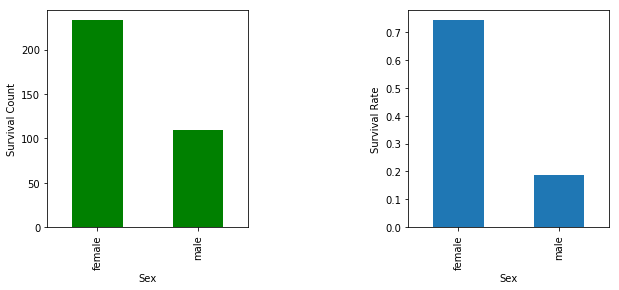

In [28]:
ax1 = plt.subplot(121)
survival_count_sex.plot(kind='bar', color='green')
ax1.set_ylabel('Survival Count')

ax2 = plt.subplot(122)
survival_rate_sex.plot(kind='bar')
ax2.set_ylabel('Survival Rate')

plt.subplots_adjust(left = 0.2, right = 1.5, wspace=0.8)


从条形图看，女性的生还人数比男性多，女性的生化率也比男性高。

> 结论：
>1. 船上男性乘客比女性乘客数量多。
>2. 性别与生还的相关系数也较小。
>3. 女性乘客获救的数量比男性多。
>4. 女性的生还率也比男性高。

<a id='question3'></a>
### Research Question 3：不同的票等级(pclass)与乘客生还的情况？

#### 3.1 单变量探索：船上三个票等级的乘客的分布情况

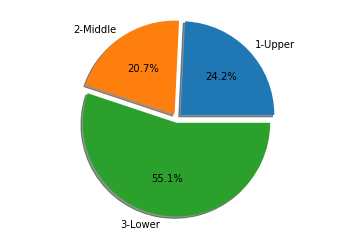

In [29]:
#画三种票等级人数的比例饼图
count_each_pclass = pd.Series(titanic_df.groupby(['Pclass'])['PassengerId'].count().values, 
                        index = ['1-Upper','2-Middle','3-Lower'])

count_each_pclass.plot(kind='pie', autopct = '%1.1f%%', shadow = True, explode = [0.05,0.05,0.05])

plt.axis('equal')
plt.ylabel('')

从饼图可以看出，所有乘客中，票等级是3(Lower)等级的乘客比例最高, 超过一半。

#### 3.2 计算生还字段(Survived)与票等级(Pclass)的相关系数

In [30]:
titanic_df['Survived'].corr(titanic_df['Pclass'], method = 'kendall')

-0.32353318439409545

生还字段与票等级字段的相关系数很小，相关度很弱。相关系数在这里仅仅作为参考。

#### 3.3 计算三种票等级的乘客的数据

In [31]:
#计算三种票的乘客的生还数
survived_count_each_pclass = pd.Series(titanic_df[titanic_df['Survived'] == 1].groupby(['Pclass'])['PassengerId'].count().values,
                                      index = ['1-Upper','2-Middle','3-Lower'])
survived_count_each_pclass

1-Upper     136
2-Middle     87
3-Lower     119
dtype: int64

In [32]:
#计算三种票的乘客的各自的生还率
survived_rate_each_pclass = survived_count_each_pclass/count_each_pclass
survived_rate_each_pclass

1-Upper     0.629630
2-Middle    0.472826
3-Lower     0.242363
dtype: float64

#### 3.4 可视化票等级与生还率

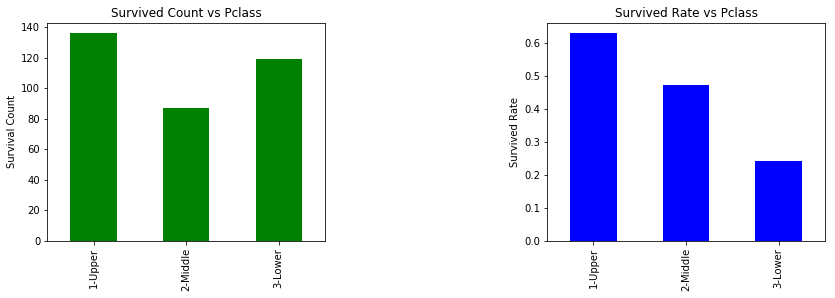

In [33]:
#画条形图
ax1 = plt.subplot(121)
survived_count_each_pclass.plot(kind='bar', color='green')
ax1.set_ylabel('Survival Count')
ax1.set_title('Survived Count vs Pclass')


ax2 = plt.subplot(122)
survived_rate_each_pclass.plot(kind='bar', color='blue')
ax2.set_ylabel('Survived Rate')
ax2.set_title('Survived Rate vs Pclass')

plt.subplots_adjust(left=0.2, right = 2.0, wspace = 0.8)

从条形图看，票等级为1(1-Upper)的乘客的生还人数较多，票等级为1(1-Upper)的乘客的生还率也较高。

> 结论：
>1. 持等级3(Lower)票的乘客数量的比例最高。
>2. 票等级字段与生还字段的相关系数很小。
>3. 从条形图看，持等级为1(1-Upper)票的乘客的生还数量最多。
>4. 从条形图看，持等级为1(1-Upper)票的乘客的生还率也较高。

<a id='question4'></a>
### Research Question 4：不同登陆港口的乘客与生化情况如何？

#### 4.1 单变量探索：看看从三个港口登陆的乘客的数量分布情况

In [34]:
titanic_df.groupby(['Embarked'])['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [35]:
#计算分别从三个港口登陆的数量. C = Cherbourg, Q = Queenstown, S = Southampton
count_from_each_port = titanic_df.groupby(['Embarked'])['PassengerId'].count()
count_from_each_port

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

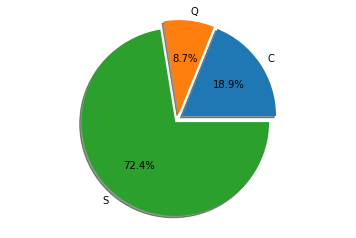

In [36]:
#画从三个港口登录的乘客的饼图
count_from_each_port.plot(kind='pie',autopct = '%1.1f%%', shadow = True, explode = [0.05,0.05,0.05])
plt.axis('equal')
plt.ylabel('')

从饼图看出，从S港口(Southampton)登录的乘客最多，达到70%多。

#### 4.2 计算登陆港口字段(Embarked)与生还字段的相关系数

In [37]:
titanic_df['Survived'].corr(titanic_df['Embarked'], method = 'kendall')

-0.15779501104311747

生还字段与登陆港口字段的相关系数很小，相关度很弱。相关系数在这里仅仅作为参考。

#### 4.3 计算各个港口登陆的乘客的生还数据

In [38]:
#计算从三个港口登陆的乘客的生还数
survived_count_each_port = titanic_df[titanic_df['Survived'] == 1].groupby(['Embarked'])['PassengerId'].count()
survived_count_each_port

Embarked
C     93
Q     30
S    217
Name: PassengerId, dtype: int64

In [39]:
#计算从每个港口登录的乘客的生还率
survived_rate_each_port = survived_count_each_port/count_from_each_port
survived_rate_each_port

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: PassengerId, dtype: float64

#### 4.4 可视化每个港口的生还率

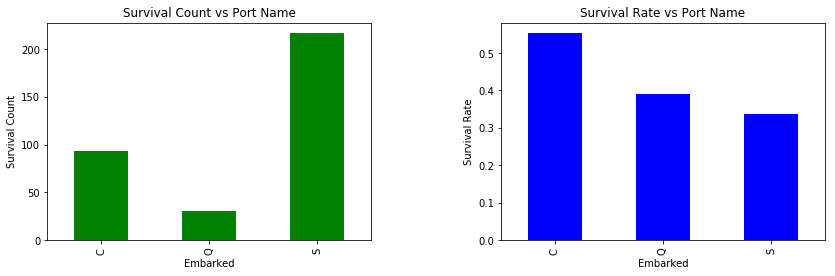

In [40]:
#画条形图
ax1 = plt.subplot(121)
survived_count_each_port.plot(kind='bar',color = 'green')
ax1.set_ylabel('Survival Count')
ax1.set_title('Survival Count vs Port Name')

ax2 = plt.subplot(122)
survived_rate_each_port.plot(kind='bar', color = 'blue')
ax2.set_ylabel('Survival Rate')
ax2.set_title('Survival Rate vs Port Name')

plt.subplots_adjust(left = 0.2, right = 2, wspace = 0.4)

从条形图看出，从S港口登录的乘客生还人数最多，而从C港口登录的乘客的生还率最高。

> 结论：
>1. 从S港口登陆的乘客数量最多。
>2. 生还字段与登陆港口字段的相关系数很小。
>3. 从条形图看，S港口的乘客生还数量最多。
>4. 从条形图看，从C港口登陆的乘客的生还率最高。

<a id='question5'></a>
### Research Question 5：费用与票价等级的对应关系如何？

#### 5.1 单变量探索：费用

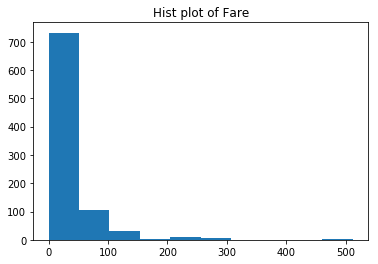

In [41]:
#画费用的直方图
titanic_df['Fare'].hist()
#设置标题
plt.title('Hist plot of Fare')
#消除网格线
plt.grid(False)

从直方图看出，大部分乘客的费用很低，在0-100之间。

#### 5.2 可视化：画票等级与费用的箱线图

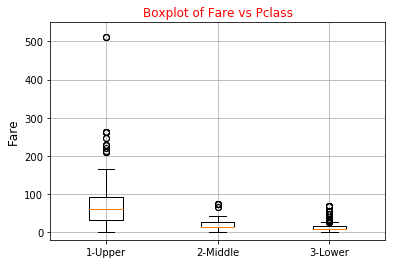

In [42]:
#画箱线图
fare_pclass_1 = titanic_df[titanic_df['Pclass'] == 1]['Fare']
fare_pclass_2 = titanic_df[titanic_df['Pclass'] == 2]['Fare']
fare_pclass_3 = titanic_df[titanic_df['Pclass'] == 3]['Fare']

plt.boxplot([fare_pclass_1,fare_pclass_2,fare_pclass_3], labels=['1-Upper', '2-Middle', '3-Lower'])
#设置y轴标签
plt.ylabel('Fare', fontsize = 12)
#设置标题
plt.title('Boxplot of Fare vs Pclass', fontsize = 12, color = 'red')
#设置y轴边界值
plt.ylim(-20,550)
#添加网格线
plt.grid()


从箱线图看出，票等级不同的乘客的费用是不同的，总体上1级(1-Upper)平均费用最高，其次到2级(2-Middle)，3级(3-Lower)费用最低。

<a id='question6'></a>
### Research Question 6：不同费用的乘客的生还情况如何？

#### 画费用与生化与否的箱线图

In [43]:
#计算生还和死亡的乘客的费用
fare_survival = titanic_df[titanic_df['Survived'] == 1]['Fare']
fare_notsurvival = titanic_df[titanic_df['Survived'] == 0]['Fare']

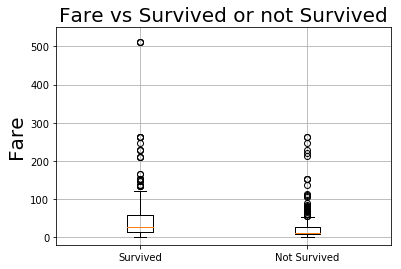

In [44]:
#画箱线图
plt.boxplot([fare_survival,fare_notsurvival], labels = ['Survived', 'Not Survived'])
#设置y轴边界值
plt.ylim([-20, 550])
#设置y轴标签
plt.ylabel('Fare', fontsize = 20)
#添加网格线
plt.grid()
#添加标题
plt.title('Fare vs Survived or not Survived', fontsize = 20)


从箱线图看，生还的乘客总体上费用更高。

<a id='question7'></a>
### Research Question 7：从三个港口登陆的乘客的费用是否有不同？

#### 画费用与不同港口的项线图

In [45]:
#分别计算从三个港口登陆的乘客的费用
fare_port_c = titanic_df[titanic_df['Embarked'] == 'C']['Fare']
fare_port_q = titanic_df[titanic_df['Embarked'] == 'Q']['Fare']
fare_port_s = titanic_df[titanic_df['Embarked'] == 'S']['Fare']

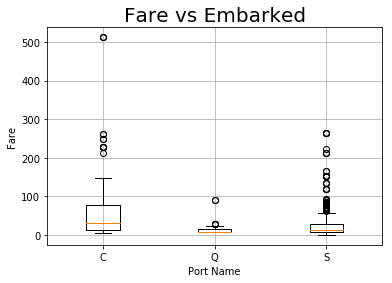

In [46]:
#画箱线图
plt.boxplot((fare_port_c,fare_port_q,fare_port_s), labels = ('C','Q','S'))
#设置x轴标签
plt.xlabel('Port Name', fontsize = 10)
#设置y轴标签
plt.ylabel('Fare', fontsize = 10)
#设置标题
plt.title('Fare vs Embarked',fontsize = 20)
#设置网格线
plt.grid(True)

总体上，从C港口登陆的乘客的费用较高。

<a id='conclusions'></a>
## Conclusions
### 单变量探索
(1). 总体死亡人数比获救生还的人数多。<br />
(2). 大部分的乘客年龄在20-40虽之间。<br />
(3). 船上的男性乘客比女性乘客的数量多。<br />
(4). 所有乘客中，票等级是3(Lower)等级的乘客比例最高, 超过一半。<br />
(5). 从S港口登陆的乘客数量最多。<br />
(6). 大部分乘客的费用很低，在0-100之间。

### 部分变量的相关系数
(1). 生还字段与年龄段字段的相关系数很小，r = -0.0562(年龄段被划分成['(0, 12]', '(12, 24]', '(24, 36]', '(36, 48]', '(48, 60]', '(60, 72]', '(72, 84]'] <br />
(2). 生还字段与性别字段的相关系数很小，r = -0.5434 <br />
(3). 生还字段与票等级字段的相关系数很小，r = -0.3235 <br />
(4). 生还字段与登陆港口字段的相关系数很小，r = -0.1578<br />
相关系数在这里仅仅作为参考。

### 生还率数据探索结果 & 费用数据探索结果
(1). 在(0-12]年龄的乘客生还率最高，在(60,72]年龄段的乘客的生还率最低，其它各年龄段的生还率差别不是很大。<br />
(2). 女性的生还数量比男性多，女性的生还率也比男性高。<br />
(3). 票等级为1(Upper)的乘客的生还率最高。<br />
(4). S港口的乘客生还数最多，但是C港口的乘客的生还率最高。<br />
<br />
(5). 票等级不同的乘客的费用是不同的，总体上1级(1-Upper)平均费用最高，其次到2级(2-Middle)，3级(3-Lower)费用最低。<br />
(6). 生还的乘客总体上费用更高。<br />
(7). 从C港口登陆的乘客的费用较高。
### 存在的限制性
(1). 年龄的缺失值有177个，报告中是用平均值来填充的，是否可能会使数据出现偏差而导致分析出现偏差呢？<br />
(2). 报告中分别计算的生还率与几个变量之间的相关系数都很小，相关性很弱。是不是还有其它因素影响到生还率还没有数据呢？<br />
(3). 会不会有一些交叉作用的因素与生还率相关性较强而没有分析到呢？<br />




<a href="#title">**返回页首**</a>